# NLP Exercise
Create a data analysis using the movie script from Pirates of the Caribbean: Dead Man's Chest


In [55]:
import nltk
import pandas as pd
from nltk.corpus import webtext

In [72]:
def read_corpus():
    # print(webtext.fileids())
    print(webtext.readme())
    return webtext.raw('pirates.txt')

pirates_txt = read_corpus()

Web Text Corpus

This is a collection of diverse, contemporary text genres,
collected by scraping publicly accessible archives of web postings.
This data is disseminated in preference to publishing URLs for
individuals to download and clean up (the usual model for web corpora).

firefox.txt: Firefox support forum
overheard.txt: Overheard in New York (partly censored) http://www.overheardinnewyork.com/ (2006)
pirates.txt: Movie script from Pirates of the Caribbean: Dead Man's Chest http://www.imsdb.com/  (2006)
grail.txt: Movie script from Monty Python and the Holy Grail http://www.textfiles.com/media/SCRIPTS/grail
singles.txt: Singles ads  http://search.classifieds.news.com.au/
wine.txt:  Fine Wine Diary http://www.finewinediary.com/ (2005-06)



## Define functions

### Tokenize

In [57]:

def tokenize(string, method="word"):
    tokens = []
    if method == "word":
        tokens = nltk.tokenize.word_tokenize(string)

    elif method == "sentence":
        tokens = nltk.tokenize.sent_tokenize(string)

    return tokens
tokenized_words = tokenize(pirates_txt)

In [143]:

def tag_pos(string, simplify=False):
    # Tokenize
    tokens = tokenize(string, method="word")

    # Tag POS
    tags = nltk.pos_tag(tokens)  # nltk.help.upenn_tagset("WRB")

    # Simpify if specified
    if simplify:
        tags = [
            (word, nltk.tag.map_tag("en-ptb", "universal", tag))
            for word, tag in tags
        ]
    return tags

tagged = tag_pos(pirates_txt)
tagged_simple = tag_pos(pirates_txt, simplify=True)

[('PIRATES', 'NNS'),
 ('OF', 'IN'),
 ('THE', 'NNP'),
 ('CARRIBEAN', 'NNP'),
 (':', ':'),
 ('DEAD', 'NNP'),
 ('MAN', 'NNP'),
 ("'S", 'POS'),
 ('CHEST', 'NNP'),
 (',', ','),
 ('by', 'IN'),
 ('Ted', 'NNP'),
 ('Elliott', 'NNP'),
 ('&', 'CC'),
 ('Terry', 'NNP'),
 ('Rossio', 'NNP'),
 ('[', 'NNP'),
 ('view', 'NN'),
 ('looking', 'VBG'),
 ('straight', 'VBD'),
 ('down', 'RB'),
 ('at', 'IN'),
 ('rolling', 'VBG'),
 ('swells', 'NNS'),
 (',', ','),
 ('sound', 'NN'),
 ('of', 'IN'),
 ('wind', 'NN'),
 ('and', 'CC'),
 ('thunder', 'NN'),
 (',', ','),
 ('then', 'RB'),
 ('a', 'DT'),
 ('low', 'JJ'),
 ('heartbeat', 'NN'),
 (']', 'JJ'),
 ('Scene', 'NN'),
 (':', ':'),
 ('PORT', 'NNP'),
 ('ROYAL', 'NNP'),
 ('[', 'NNP'),
 ('teacups', 'NNS'),
 ('on', 'IN'),
 ('a', 'DT'),
 ('table', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('rain', 'NN'),
 (']', 'JJ'),
 ('[', 'NNP'),
 ('sheet', 'NN'),
 ('music', 'NN'),
 ('on', 'IN'),
 ('music', 'NN'),
 ('stands', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('rain', 'NN'),
 (']', 'NNP'),

In [59]:

def lemmatize(string):
    # tokenize
    tokens = tokenize(string, method="word")

    # init lemmatizer
    lemmatizer = nltk.stem.WordNetLemmatizer()

    lem_words = [lemmatizer.lemmatize(word) for word in tokens]

    return lem_words

lemmatized = lemmatize(pirates_txt)

In [176]:
def chunk(string, type='nouns'):
    # GEt POS
    pos_tags = tag_pos(string)
    # Define grammar
    grammar = ''
    match type:
        case 'nouns':
            grammar = "NP: {<NNP><NNP>+}"
    # Create parser
    parser = nltk.RegexpParser(grammar=grammar)
    # Chunk
    chunk_str = parser.parse(pos_tags)
    return chunk_str


## Get most frequently occuring word



In [64]:
from collections import Counter

words_with_count = Counter(tokenized_words)
words_with_count.most_common(100)

[('the', 1027),
 (':', 916),
 (',', 855),
 ('.', 801),
 ('[', 643),
 (']', 642),
 ('!', 430),
 ('a', 410),
 ('to', 363),
 ('of', 282),
 ('Jack', 277),
 ('?', 232),
 ('*', 222),
 ("'s", 218),
 ('I', 214),
 ('you', 213),
 ('and', 210),
 ('is', 200),
 ('JACK', 193),
 ('SPARROW', 193),
 ('in', 190),
 ('on', 177),
 ('it', 160),
 ('his', 144),
 ('WILL', 133),
 ('TURNER', 133),
 ('...', 129),
 ('Will', 122),
 ('with', 94),
 ('ELIZABETH', 93),
 ('SWANN', 93),
 ('at', 91),
 ('from', 89),
 ('GIBBS', 86),
 ('that', 81),
 ('Elizabeth', 72),
 ('do', 71),
 ("n't", 70),
 ('up', 70),
 ('as', 69),
 ('for', 68),
 ('are', 63),
 ('You', 63),
 ('off', 58),
 ('back', 57),
 ('not', 55),
 ("'", 53),
 ('your', 53),
 ('we', 52),
 ('ship', 52),
 ('chest', 51),
 ('him', 51),
 ('be', 50),
 ('one', 49),
 ('what', 48),
 ('into', 48),
 ('me', 48),
 ('#', 48),
 ('all', 47),
 ('Norrington', 46),
 ('DAVY', 46),
 ('JONES', 46),
 ('And', 45),
 ('crew', 45),
 ('The', 44),
 ('have', 44),
 ("'re", 44),
 ('Jones', 44),
 ('dec

In [66]:

def filter_stop_words(string):
    # Tokenize
    tokens = tokenize(string, method="word")

    # Get list of stop words
    stop_words = set(nltk.corpus.stopwords.words("english"))

    filtered_tokens = []

    for word in tokens:
        if word.casefold() not in stop_words:
            filtered_tokens.append(word)

    return filtered_tokens
filtered_words= filter_stop_words(pirates_txt)
filtered_counter = Counter(filtered_words)
filtered_counter.most_common(10)

[(':', 916),
 (',', 855),
 ('.', 801),
 ('[', 643),
 (']', 642),
 ('!', 430),
 ('Jack', 277),
 ('?', 232),
 ('*', 222),
 ("'s", 218)]

In [97]:
def tokenizer_words_only(string, method='word'):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(string)
    stop_words = set(nltk.corpus.stopwords.words("english"))

    filtered_tokens = []

    for word in tokens:
        if word.casefold() not in stop_words:
            filtered_tokens.append(word)

    return filtered_tokens
filtered_words= tokenizer_words_only(pirates_txt)
filtered_counter = Counter(filtered_words)
filtered_counter.most_common()

[('Jack', 277),
 ('JACK', 193),
 ('SPARROW', 193),
 ('TURNER', 133),
 ('ELIZABETH', 93),
 ('SWANN', 93),
 ('GIBBS', 86),
 ('Elizabeth', 72),
 ('back', 57),
 ('ship', 52),
 ('chest', 51),
 ('one', 49),
 ('Norrington', 46),
 ('DAVY', 46),
 ('JONES', 46),
 ('crew', 45),
 ('Jones', 44),
 ('deck', 43),
 ('Pearl', 42),
 ('key', 40),
 ('PINTEL', 39),
 ('Scene', 37),
 ('ha', 37),
 ('man', 36),
 ('know', 34),
 ('LORD', 34),
 ('CUTLER', 34),
 ('BECKETT', 34),
 ('Sparrow', 34),
 ('Black', 34),
 ('Ragetti', 32),
 ('men', 31),
 ('us', 31),
 ('Dutchman', 30),
 ('Flying', 29),
 ('find', 28),
 ('want', 28),
 ('RAGETTI', 28),
 ('NORRINGTON', 28),
 ('Oh', 27),
 ('Gibbs', 27),
 ('Pintel', 27),
 ('hand', 26),
 ('Come', 26),
 ('behind', 26),
 ('TIA', 26),
 ('DALMA', 26),
 ('beach', 25),
 ('bottle', 24),
 ('cage', 24),
 ('sword', 24),
 ('Kraken', 24),
 ('see', 23),
 ('like', 23),
 ('around', 23),
 ('head', 23),
 ('Beckett', 22),
 ('face', 22),
 ('sea', 22),
 ('Bootstrap', 22),
 ('CANNIBAL', 22),
 ('falls', 

<Axes: ylabel='Word'>

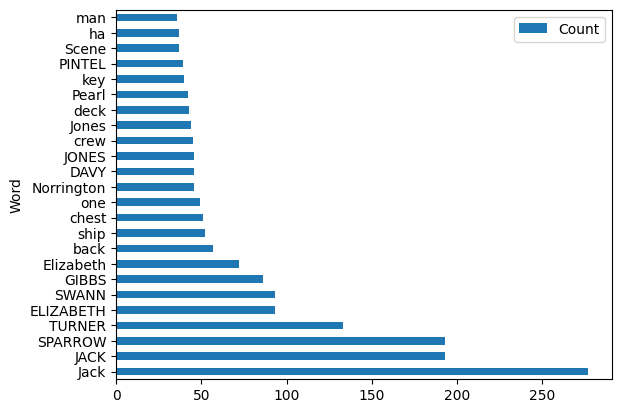

In [140]:
from matplotlib import pyplot as plt

df = pd.DataFrame(filtered_counter.most_common(), columns=['Word','Count'])
top_25 = df.sort_values(by=['Count'], ascending=False)[0:24]

top_25.plot(kind='barh', x="Word", y="Count")

In [117]:

def tokenizer_words_only(string, method='word'):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(string)
    stop_words = set(nltk.corpus.stopwords.words("english"))

    filtered_tokens = []

    for word in tokens:
        if word.casefold() not in stop_words:
            filtered_tokens.append(word)

    return filtered_tokens

In [118]:
def lemmatize(string):
    # tokenize
    tokens = tokenizer_words_only(string, method="word")

    # init lemmatizer
    lemmatizer = nltk.stem.WordNetLemmatizer()

    lem_words = [lemmatizer.lemmatize(word) for word in tokens]

    return lem_words

lemmatized = lemmatize(pirates_txt)
lem_count = Counter(lemmatized)
lem_count.most_common()

[('Jack', 277),
 ('JACK', 193),
 ('SPARROW', 193),
 ('TURNER', 133),
 ('ELIZABETH', 93),
 ('SWANN', 93),
 ('GIBBS', 86),
 ('Elizabeth', 72),
 ('back', 60),
 ('ship', 55),
 ('chest', 51),
 ('one', 49),
 ('Norrington', 46),
 ('DAVY', 46),
 ('JONES', 46),
 ('crew', 45),
 ('key', 44),
 ('Jones', 44),
 ('deck', 43),
 ('see', 42),
 ('Pearl', 42),
 ('hand', 41),
 ('PINTEL', 39),
 ('want', 38),
 ('Scene', 37),
 ('ha', 37),
 ('man', 36),
 ('know', 35),
 ('look', 34),
 ('LORD', 34),
 ('CUTLER', 34),
 ('BECKETT', 34),
 ('Sparrow', 34),
 ('Black', 34),
 ('cage', 33),
 ('find', 33),
 ('cannibal', 32),
 ('Ragetti', 32),
 ('men', 31),
 ('u', 31),
 ('go', 31),
 ('Dutchman', 30),
 ('bottle', 29),
 ('sword', 29),
 ('Flying', 29),
 ('walk', 28),
 ('RAGETTI', 28),
 ('NORRINGTON', 28),
 ('Oh', 27),
 ('Gibbs', 27),
 ('Pintel', 27),
 ('Come', 26),
 ('behind', 26),
 ('TIA', 26),
 ('DALMA', 26),
 ('face', 25),
 ('beach', 25),
 ('head', 25),
 ('grab', 24),
 ('crewman', 24),
 ('fall', 24),
 ('tentacle', 24),
 ('

In [142]:
sentences = tokenize(pirates_txt, method="sentence")


top_words = filtered_counter.most_common(10)
top_words = [x[0] for x in top_words]
sentences_with_string = []

for sentence in sentences:
    if any(word in sentence for word in ['back']):
        sentences_with_string.append(sentence)

sentences_with_string


["PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terry Rossio\n[view looking straight down at rolling swells, sound of wind and thunder, then a low heartbeat]\nScene: PORT ROYAL\n[teacups on a table in the rain]\n[sheet music on music stands in the rain]\n[bouquet of white orchids, Elizabeth sitting in the rain holding the bouquet]\n[men rowing, men on horseback, to the sound of thunder]\n[EITC logo on flag blowing in the wind]\n[many rowboats are entering the harbor]\n[Elizabeth sitting alone, at a distance]\n[marines running, kick a door in] \n[a mule is seen on the left in the barn where the marines enter]\n[Liz looking over her shoulder]\n[Elizabeth drops her bouquet]\n[Will is in manacles, being escorted by red coats]\nELIZABETH SWANN: Will...!",
 "[Jack uses the skeleton leg as an oar, rows toward the full moon and a waiting ship in the distance to the right of the moon]\nScene: BLACK PEARL\n[Jack arrives at the Black Pearl in his coffin rowboat]\n[Gibbs holds out h

## Classifying words

In [146]:

def tag_pos(string, simplify=False):
    # Tokenize
    tokens = tokenizer_words_only(string, method="word")

    # Tag POS
    tags = nltk.pos_tag(tokens)  # nltk.help.upenn_tagset("WRB")

    # Simpify if specified
    if simplify:
        tags = [
            (word, nltk.tag.map_tag("en-ptb", "universal", tag))
            for word, tag in tags
        ]
    return tags

word_w_tags = tag_pos(pirates_txt)
word_w_tags

[('PIRATES', 'JJ'),
 ('CARRIBEAN', 'NNP'),
 ('DEAD', 'NNP'),
 ('MAN', 'NNP'),
 ('CHEST', 'NNP'),
 ('Ted', 'NNP'),
 ('Elliott', 'NNP'),
 ('Terry', 'NNP'),
 ('Rossio', 'NNP'),
 ('view', 'NN'),
 ('looking', 'VBG'),
 ('straight', 'VBD'),
 ('rolling', 'VBG'),
 ('swells', 'NNS'),
 ('sound', 'JJ'),
 ('wind', 'IN'),
 ('thunder', 'NN'),
 ('low', 'JJ'),
 ('heartbeat', 'NN'),
 ('Scene', 'NNP'),
 ('PORT', 'NNP'),
 ('ROYAL', 'NNP'),
 ('teacups', 'NNS'),
 ('table', 'JJ'),
 ('rain', 'JJ'),
 ('sheet', 'NN'),
 ('music', 'NN'),
 ('music', 'NN'),
 ('stands', 'VBZ'),
 ('rain', 'JJ'),
 ('bouquet', 'IN'),
 ('white', 'JJ'),
 ('orchids', 'NNS'),
 ('Elizabeth', 'NNP'),
 ('sitting', 'VBG'),
 ('rain', 'NN'),
 ('holding', 'VBG'),
 ('bouquet', 'JJ'),
 ('men', 'NNS'),
 ('rowing', 'VBG'),
 ('men', 'NNS'),
 ('horseback', 'VBP'),
 ('sound', 'JJ'),
 ('thunder', 'NN'),
 ('EITC', 'NNP'),
 ('logo', 'NN'),
 ('flag', 'NN'),
 ('blowing', 'VBG'),
 ('wind', 'IN'),
 ('many', 'JJ'),
 ('rowboats', 'NNS'),
 ('entering', 'VBG'),
 (

## Getting words that are not names

In [160]:
no_names = [x[0] for x in word_w_tags if(x[1] not in ["NNP"])]
no_names_counter = Counter(no_names)
no_names_counter.most_common(10)

[('back', 57),
 ('ship', 52),
 ('chest', 51),
 ('one', 49),
 ('crew', 45),
 ('deck', 43),
 ('key', 40),
 ('ha', 37),
 ('man', 36),
 ('know', 33)]

In [161]:
top_words = no_names_counter.most_common(10)
top_words = [x[0] for x in top_words]
sentences_with_string = []

for sentence in sentences:
    if any(word in sentence for word in ['back']):
        sentences_with_string.append(sentence)

sentences_with_string

["PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terry Rossio\n[view looking straight down at rolling swells, sound of wind and thunder, then a low heartbeat]\nScene: PORT ROYAL\n[teacups on a table in the rain]\n[sheet music on music stands in the rain]\n[bouquet of white orchids, Elizabeth sitting in the rain holding the bouquet]\n[men rowing, men on horseback, to the sound of thunder]\n[EITC logo on flag blowing in the wind]\n[many rowboats are entering the harbor]\n[Elizabeth sitting alone, at a distance]\n[marines running, kick a door in] \n[a mule is seen on the left in the barn where the marines enter]\n[Liz looking over her shoulder]\n[Elizabeth drops her bouquet]\n[Will is in manacles, being escorted by red coats]\nELIZABETH SWANN: Will...!",
 "[Jack uses the skeleton leg as an oar, rows toward the full moon and a waiting ship in the distance to the right of the moon]\nScene: BLACK PEARL\n[Jack arrives at the Black Pearl in his coffin rowboat]\n[Gibbs holds out h

<Axes: ylabel='Word'>

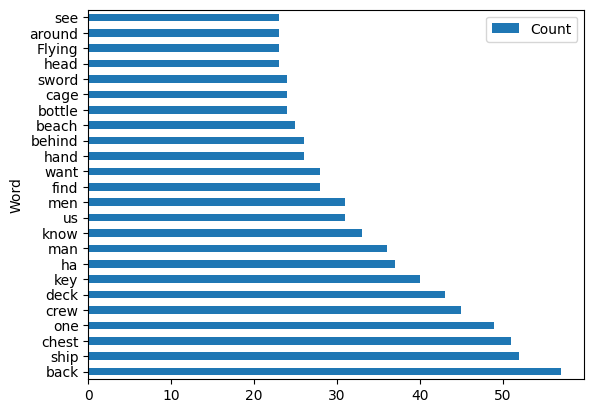

In [170]:


df = pd.DataFrame(no_names_counter.most_common(), columns=['Word','Count'])
top_25 = df.sort_values(by=['Count'], ascending=False)[0:24]

top_25.plot(kind='barh', x="Word", y="Count")

## Getting Names only

In [169]:
names = [x[0] for x in word_w_tags if(x[1] in ["NNP"])]
names_counter = Counter(names)
names_counter.most_common()

[('Jack', 277),
 ('JACK', 193),
 ('SPARROW', 193),
 ('TURNER', 132),
 ('ELIZABETH', 93),
 ('SWANN', 93),
 ('GIBBS', 86),
 ('Elizabeth', 72),
 ('Norrington', 46),
 ('DAVY', 46),
 ('JONES', 46),
 ('Jones', 44),
 ('Pearl', 42),
 ('PINTEL', 39),
 ('Scene', 37),
 ('LORD', 34),
 ('CUTLER', 34),
 ('BECKETT', 34),
 ('Sparrow', 34),
 ('Black', 34)]

<Axes: ylabel='Word'>

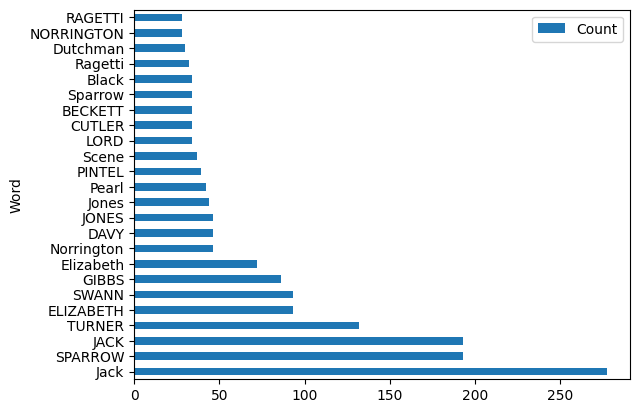

In [171]:
df = pd.DataFrame(names_counter.most_common(), columns=['Word','Count'])
top_25 = df.sort_values(by=['Count'], ascending=False)[0:24]

top_25.plot(kind='barh', x="Word", y="Count")

In [178]:
chunks = chunk(pirates_txt)
print(list(chunks))

[('PIRATES', 'JJ'), Tree('NP', [('CARRIBEAN', 'NNP'), ('DEAD', 'NNP'), ('MAN', 'NNP'), ('CHEST', 'NNP'), ('Ted', 'NNP'), ('Elliott', 'NNP'), ('Terry', 'NNP'), ('Rossio', 'NNP')]), ('view', 'NN'), ('looking', 'VBG'), ('straight', 'VBD'), ('rolling', 'VBG'), ('swells', 'NNS'), ('sound', 'JJ'), ('wind', 'IN'), ('thunder', 'NN'), ('low', 'JJ'), ('heartbeat', 'NN'), Tree('NP', [('Scene', 'NNP'), ('PORT', 'NNP'), ('ROYAL', 'NNP')]), ('teacups', 'NNS'), ('table', 'JJ'), ('rain', 'JJ'), ('sheet', 'NN'), ('music', 'NN'), ('music', 'NN'), ('stands', 'VBZ'), ('rain', 'JJ'), ('bouquet', 'IN'), ('white', 'JJ'), ('orchids', 'NNS'), ('Elizabeth', 'NNP'), ('sitting', 'VBG'), ('rain', 'NN'), ('holding', 'VBG'), ('bouquet', 'JJ'), ('men', 'NNS'), ('rowing', 'VBG'), ('men', 'NNS'), ('horseback', 'VBP'), ('sound', 'JJ'), ('thunder', 'NN'), ('EITC', 'NNP'), ('logo', 'NN'), ('flag', 'NN'), ('blowing', 'VBG'), ('wind', 'IN'), ('many', 'JJ'), ('rowboats', 'NNS'), ('entering', 'VBG'), ('harbor', 'NN'), ('Eliza

## Conclusion

- Main characters [Jack Sparrow, Will Turner, Elizabeth Swann, Gibbs]
- mainly about ships, chests, crews, and getting back/something back